# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [12]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [13]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

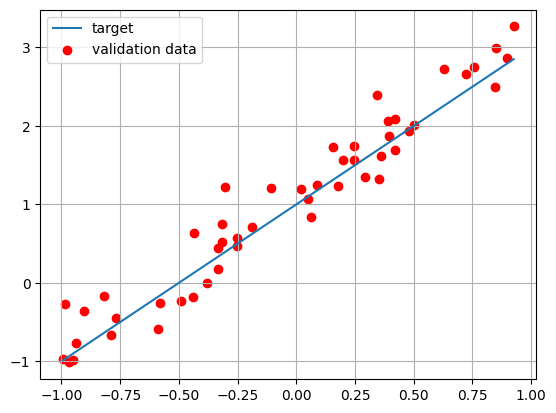

In [14]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [15]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [16]:
# get a summary of our composed model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [17]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 0s 10ms/step - loss: 3.5428 - mse: 3.5428 - val_loss: 2.8428 - val_mse: 2.8428
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 2.6836 - mse: 2.6836 - val_loss: 2.1809 - val_mse: 2.1809
Epoch 3/30
16/16 [==============================] - 0s 5ms/step - loss: 2.0760 - mse: 2.0760 - val_loss: 1.7050 - val_mse: 1.7050
Epoch 4/30
16/16 [==============================] - 0s 5ms/step - loss: 1.6337 - mse: 1.6337 - val_loss: 1.3522 - val_mse: 1.3522
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 1.3033 - mse: 1.3033 - val_loss: 1.0851 - val_mse: 1.0851
Epoch 6/30
16/16 [==============================] - 0s 8ms/step - loss: 1.0513 - mse: 1.0513 - val_loss: 0.8767 - val_mse: 0.8767
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.8533 - mse: 0.8533 - val_loss: 0.7169 - val_mse: 0.7169
Epoch 8/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6999 - mse: 0.6

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [18]:
# return weights and biases
model.get_weights()

[array([[1.9183409]], dtype=float32), array([0.9673157], dtype=float32)]

In [19]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 0s/step - loss: 0.1018 - mse: 0.1018

Test loss: 0.10180193185806274
Test accuracy: 0.10180193185806274


In [20]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 0s/step - loss: 0.0029 - mse: 0.0029

Test loss: 0.0029159432742744684
Test accuracy: 0.0029159432742744684


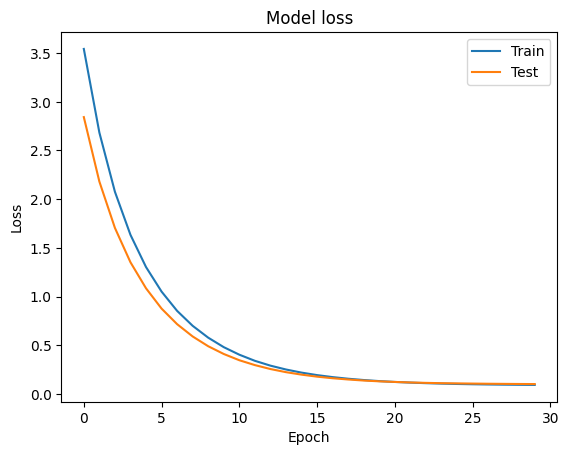

In [21]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 0s/step


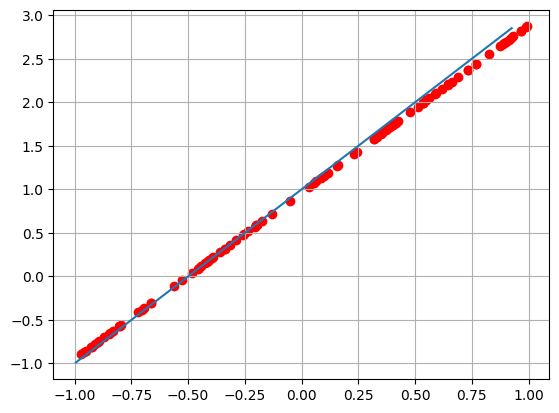

In [22]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

In [ ]:
np.random.seed(0)


In [47]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

N_epochs = np.arange(1, 10)
N_points = np.arange(1, 300, 10)
loss = np.zeros((len(N_points), len(N_epochs)))
acc = np.zeros((len(N_points), len(N_epochs)))

for i in range(len(N_epochs)):
    for j in range(len(N_points)):
        x_train = np.random.uniform(-1, 1, N_points[j])
        x_valid = np.random.uniform(-1, 1, 50)
        x_valid.sort()
        y_target = m * x_valid + b # ideal (target) linear function

        sigma = 0.3 # noise standard deviation, for the moment it is absent
        y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
        y_valid = np.random.normal(m * x_valid + b, sigma)
        history = model.fit(x=x_train, y=y_train, 
                  batch_size=32, epochs=N_epochs[i],
                  shuffle=True, # a good idea is to shuffle input before at each epoch
                  validation_data=(x_valid, y_valid))
        score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
        loss[j,i], acc[j,i] = score[0], score[1]


2/2 [==============================] - 0s 0s/step - loss: 0.2224 - mse: 0.2224
Epoch 1/2
1/1 [==============================] - 0s 62ms/step - loss: 1.2455e-06 - mse: 1.2455e-06 - val_loss: 0.1903 - val_mse: 0.1903
Epoch 2/2
2/2 [==============================] - 0s 0s/step - loss: 0.1903 - mse: 0.1903
Epoch 1/2
1/1 [==============================] - 0s 78ms/step - loss: 0.2187 - mse: 0.2187 - val_loss: 0.1955 - val_mse: 0.1955
Epoch 2/2
2/2 [==============================] - 0s 0s/step - loss: 0.1928 - mse: 0.1928
Epoch 1/2
2/2 [==============================] - 0s 125ms/step - loss: 0.2030 - mse: 0.2030 - val_loss: 0.1524 - val_mse: 0.1524
Epoch 2/2
2/2 [==============================] - 0s 16ms/step - loss: 0.1485 - mse: 0.1485
Epoch 1/2
2/2 [==============================] - 0s 63ms/step - loss: 0.1656 - mse: 0.1656 - val_loss: 0.2087 - val_mse: 0.2087
Epoch 2/2
2/2 [==============================] - 0s 0s/step - loss: 0.2059 - mse: 0.2059
Epoch 1/2
3/3 [===========================

1/1 [==============================] - 0s 62ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0811 - val_mse: 0.0811
Epoch 3/3
2/2 [==============================] - 0s 0s/step - loss: 0.0811 - mse: 0.0811
Epoch 1/3
1/1 [==============================] - 0s 78ms/step - loss: 0.1403 - mse: 0.1403 - val_loss: 0.0941 - val_mse: 0.0941
Epoch 2/3
1/1 [==============================] - 0s 31ms/step - loss: 0.1401 - mse: 0.1401 - val_loss: 0.0941 - val_mse: 0.0941
Epoch 3/3
2/2 [==============================] - 0s 0s/step - loss: 0.0940 - mse: 0.0940
Epoch 1/3
2/2 [==============================] - 0s 47ms/step - loss: 0.0910 - mse: 0.0910 - val_loss: 0.0782 - val_mse: 0.0782
Epoch 2/3
2/2 [==============================] - 0s 31ms/step - loss: 0.0908 - mse: 0.0908 - val_loss: 0.0780 - val_mse: 0.0780
Epoch 3/3
2/2 [==============================] - 0s 0s/step - loss: 0.0777 - mse: 0.0777
Epoch 1/3
2/2 [==============================] - 0s 94ms/step - loss: 0.0708 - mse: 0.0708 - val_loss: 

2/2 [==============================] - 0s 31ms/step - loss: 0.1079 - mse: 0.1079 - val_loss: 0.0785 - val_mse: 0.0785
Epoch 3/4
2/2 [==============================] - 0s 62ms/step - loss: 0.1075 - mse: 0.1075 - val_loss: 0.0782 - val_mse: 0.0782
Epoch 4/4
2/2 [==============================] - 0s 0s/step - loss: 0.0781 - mse: 0.0781
Epoch 1/4
2/2 [==============================] - 0s 47ms/step - loss: 0.0709 - mse: 0.0709 - val_loss: 0.0895 - val_mse: 0.0895
Epoch 2/4
2/2 [==============================] - 0s 78ms/step - loss: 0.0709 - mse: 0.0709 - val_loss: 0.0894 - val_mse: 0.0894
Epoch 3/4
2/2 [==============================] - 0s 78ms/step - loss: 0.0709 - mse: 0.0709 - val_loss: 0.0894 - val_mse: 0.0894
Epoch 4/4
2/2 [==============================] - 0s 0s/step - loss: 0.0894 - mse: 0.0894
Epoch 1/4
3/3 [==============================] - 0s 23ms/step - loss: 0.0928 - mse: 0.0928 - val_loss: 0.0828 - val_mse: 0.0828
Epoch 2/4
3/3 [==============================] - 0s 16ms/step - 

2/2 [==============================] - 0s 0s/step - loss: 0.0665 - mse: 0.0665
Epoch 1/5
1/1 [==============================] - 0s 47ms/step - loss: 0.0825 - mse: 0.0825 - val_loss: 0.0953 - val_mse: 0.0953
Epoch 2/5
1/1 [==============================] - 0s 31ms/step - loss: 0.0823 - mse: 0.0823 - val_loss: 0.0952 - val_mse: 0.0952
Epoch 3/5
1/1 [==============================] - 0s 31ms/step - loss: 0.0820 - mse: 0.0820 - val_loss: 0.0952 - val_mse: 0.0952
Epoch 4/5
1/1 [==============================] - 0s 31ms/step - loss: 0.0818 - mse: 0.0818 - val_loss: 0.0952 - val_mse: 0.0952
Epoch 5/5
2/2 [==============================] - 0s 0s/step - loss: 0.0952 - mse: 0.0952
Epoch 1/5
2/2 [==============================] - 0s 47ms/step - loss: 0.1415 - mse: 0.1415 - val_loss: 0.0812 - val_mse: 0.0812
Epoch 2/5
2/2 [==============================] - 0s 63ms/step - loss: 0.1402 - mse: 0.1402 - val_loss: 0.0805 - val_mse: 0.0805
Epoch 3/5
2/2 [==============================] - 0s 62ms/step - 

Epoch 3/5
8/8 [==============================] - 0s 4ms/step - loss: 0.0804 - mse: 0.0804 - val_loss: 0.1104 - val_mse: 0.1104
Epoch 4/5
8/8 [==============================] - 0s 4ms/step - loss: 0.0803 - mse: 0.0803 - val_loss: 0.1104 - val_mse: 0.1104
Epoch 5/5
2/2 [==============================] - 0s 16ms/step - loss: 0.1104 - mse: 0.1104
Epoch 1/5
9/9 [==============================] - 0s 8ms/step - loss: 0.0674 - mse: 0.0674 - val_loss: 0.0930 - val_mse: 0.0930
Epoch 2/5
9/9 [==============================] - 0s 4ms/step - loss: 0.0673 - mse: 0.0673 - val_loss: 0.0929 - val_mse: 0.0929
Epoch 3/5
9/9 [==============================] - 0s 4ms/step - loss: 0.0671 - mse: 0.0671 - val_loss: 0.0928 - val_mse: 0.0928
Epoch 4/5
9/9 [==============================] - 0s 4ms/step - loss: 0.0669 - mse: 0.0669 - val_loss: 0.0930 - val_mse: 0.0930
Epoch 5/5
2/2 [==============================] - 0s 0s/step - loss: 0.0932 - mse: 0.0932
Epoch 1/5
9/9 [==============================] - 0s 10ms/s

Epoch 4/6
5/5 [==============================] - 0s 8ms/step - loss: 0.0955 - mse: 0.0955 - val_loss: 0.0706 - val_mse: 0.0706
Epoch 5/6
5/5 [==============================] - 0s 8ms/step - loss: 0.0955 - mse: 0.0955 - val_loss: 0.0707 - val_mse: 0.0707
Epoch 6/6
2/2 [==============================] - 0s 0s/step - loss: 0.0707 - mse: 0.0707
Epoch 1/6
6/6 [==============================] - 0s 25ms/step - loss: 0.0855 - mse: 0.0855 - val_loss: 0.0541 - val_mse: 0.0541
Epoch 2/6
6/6 [==============================] - 0s 9ms/step - loss: 0.0854 - mse: 0.0854 - val_loss: 0.0541 - val_mse: 0.0541
Epoch 3/6
6/6 [==============================] - 0s 16ms/step - loss: 0.0854 - mse: 0.0854 - val_loss: 0.0541 - val_mse: 0.0541
Epoch 4/6
6/6 [==============================] - 0s 6ms/step - loss: 0.0854 - mse: 0.0854 - val_loss: 0.0542 - val_mse: 0.0542
Epoch 5/6
6/6 [==============================] - 0s 6ms/step - loss: 0.0855 - mse: 0.0855 - val_loss: 0.0542 - val_mse: 0.0542
Epoch 6/6
2/2 [=====

2/2 [==============================] - 0s 0s/step - loss: 0.0942 - mse: 0.0942
Epoch 1/7
2/2 [==============================] - 0s 94ms/step - loss: 0.0716 - mse: 0.0716 - val_loss: 0.0892 - val_mse: 0.0892
Epoch 2/7
2/2 [==============================] - 0s 47ms/step - loss: 0.0716 - mse: 0.0716 - val_loss: 0.0892 - val_mse: 0.0892
Epoch 3/7
2/2 [==============================] - 0s 31ms/step - loss: 0.0716 - mse: 0.0716 - val_loss: 0.0892 - val_mse: 0.0892
Epoch 4/7
2/2 [==============================] - 0s 31ms/step - loss: 0.0716 - mse: 0.0716 - val_loss: 0.0891 - val_mse: 0.0891
Epoch 5/7
2/2 [==============================] - 0s 31ms/step - loss: 0.0716 - mse: 0.0716 - val_loss: 0.0892 - val_mse: 0.0892
Epoch 6/7
2/2 [==============================] - 0s 31ms/step - loss: 0.0716 - mse: 0.0716 - val_loss: 0.0892 - val_mse: 0.0892
Epoch 7/7
2/2 [==============================] - 0s 0s/step - loss: 0.0892 - mse: 0.0892
Epoch 1/7
2/2 [==============================] - 0s 141ms/step -

7/7 [==============================] - 0s 13ms/step - loss: 0.0894 - mse: 0.0894 - val_loss: 0.1158 - val_mse: 0.1158
Epoch 3/7
7/7 [==============================] - 0s 8ms/step - loss: 0.0893 - mse: 0.0893 - val_loss: 0.1165 - val_mse: 0.1165
Epoch 4/7
7/7 [==============================] - 0s 5ms/step - loss: 0.0891 - mse: 0.0891 - val_loss: 0.1170 - val_mse: 0.1170
Epoch 5/7
7/7 [==============================] - 0s 8ms/step - loss: 0.0890 - mse: 0.0890 - val_loss: 0.1176 - val_mse: 0.1176
Epoch 6/7
7/7 [==============================] - 0s 13ms/step - loss: 0.0889 - mse: 0.0889 - val_loss: 0.1181 - val_mse: 0.1181
Epoch 7/7
2/2 [==============================] - 0s 16ms/step - loss: 0.1187 - mse: 0.1187
Epoch 1/7
7/7 [==============================] - 0s 10ms/step - loss: 0.0853 - mse: 0.0853 - val_loss: 0.0852 - val_mse: 0.0852
Epoch 2/7
7/7 [==============================] - 0s 5ms/step - loss: 0.0854 - mse: 0.0854 - val_loss: 0.0851 - val_mse: 0.0851
Epoch 3/7
7/7 [============

2/2 [==============================] - 0s 62ms/step - loss: 0.1125 - mse: 0.1125 - val_loss: 0.0712 - val_mse: 0.0712
Epoch 3/8
2/2 [==============================] - 0s 47ms/step - loss: 0.1124 - mse: 0.1124 - val_loss: 0.0711 - val_mse: 0.0711
Epoch 4/8
2/2 [==============================] - 0s 78ms/step - loss: 0.1123 - mse: 0.1123 - val_loss: 0.0709 - val_mse: 0.0709
Epoch 5/8
2/2 [==============================] - 0s 62ms/step - loss: 0.1123 - mse: 0.1123 - val_loss: 0.0708 - val_mse: 0.0708
Epoch 6/8
2/2 [==============================] - 0s 78ms/step - loss: 0.1120 - mse: 0.1120 - val_loss: 0.0706 - val_mse: 0.0706
Epoch 7/8
2/2 [==============================] - 0s 78ms/step - loss: 0.1119 - mse: 0.1119 - val_loss: 0.0705 - val_mse: 0.0705
Epoch 8/8
2/2 [==============================] - 0s 0s/step - loss: 0.0704 - mse: 0.0704
Epoch 1/8
3/3 [==============================] - 0s 31ms/step - loss: 0.0888 - mse: 0.0888 - val_loss: 0.0926 - val_mse: 0.0926
Epoch 2/8
3/3 [==========

Epoch 6/8
7/7 [==============================] - 0s 16ms/step - loss: 0.1010 - mse: 0.1010 - val_loss: 0.0909 - val_mse: 0.0909
Epoch 7/8
7/7 [==============================] - 0s 13ms/step - loss: 0.1010 - mse: 0.1010 - val_loss: 0.0908 - val_mse: 0.0908
Epoch 8/8
2/2 [==============================] - 0s 16ms/step - loss: 0.0908 - mse: 0.0908
Epoch 1/8
7/7 [==============================] - 0s 10ms/step - loss: 0.0929 - mse: 0.0929 - val_loss: 0.1178 - val_mse: 0.1178
Epoch 2/8
7/7 [==============================] - 0s 5ms/step - loss: 0.0924 - mse: 0.0924 - val_loss: 0.1173 - val_mse: 0.1173
Epoch 3/8
7/7 [==============================] - 0s 5ms/step - loss: 0.0920 - mse: 0.0920 - val_loss: 0.1169 - val_mse: 0.1169
Epoch 4/8
7/7 [==============================] - 0s 13ms/step - loss: 0.0917 - mse: 0.0917 - val_loss: 0.1166 - val_mse: 0.1166
Epoch 5/8
7/7 [==============================] - 0s 8ms/step - loss: 0.0914 - mse: 0.0914 - val_loss: 0.1164 - val_mse: 0.1164
Epoch 6/8
7/7 [=

Epoch 8/9
2/2 [==============================] - 0s 47ms/step - loss: 0.0669 - mse: 0.0669 - val_loss: 0.0975 - val_mse: 0.0975
Epoch 9/9
2/2 [==============================] - 0s 16ms/step - loss: 0.0975 - mse: 0.0975
Epoch 1/9
2/2 [==============================] - 0s 47ms/step - loss: 0.0900 - mse: 0.0900 - val_loss: 0.1090 - val_mse: 0.1090
Epoch 2/9
2/2 [==============================] - 0s 31ms/step - loss: 0.0900 - mse: 0.0900 - val_loss: 0.1090 - val_mse: 0.1090
Epoch 3/9
2/2 [==============================] - 0s 62ms/step - loss: 0.0899 - mse: 0.0899 - val_loss: 0.1091 - val_mse: 0.1091
Epoch 4/9
2/2 [==============================] - 0s 63ms/step - loss: 0.0900 - mse: 0.0900 - val_loss: 0.1091 - val_mse: 0.1091
Epoch 5/9
2/2 [==============================] - 0s 78ms/step - loss: 0.0899 - mse: 0.0899 - val_loss: 0.1092 - val_mse: 0.1092
Epoch 6/9
2/2 [==============================] - 0s 47ms/step - loss: 0.0899 - mse: 0.0899 - val_loss: 0.1092 - val_mse: 0.1092
Epoch 7/9
2/2

Epoch 5/9
6/6 [==============================] - 0s 6ms/step - loss: 0.0882 - mse: 0.0882 - val_loss: 0.0799 - val_mse: 0.0799
Epoch 6/9
6/6 [==============================] - 0s 19ms/step - loss: 0.0882 - mse: 0.0882 - val_loss: 0.0800 - val_mse: 0.0800
Epoch 7/9
6/6 [==============================] - 0s 9ms/step - loss: 0.0881 - mse: 0.0881 - val_loss: 0.0801 - val_mse: 0.0801
Epoch 8/9
6/6 [==============================] - 0s 6ms/step - loss: 0.0881 - mse: 0.0881 - val_loss: 0.0801 - val_mse: 0.0801
Epoch 9/9
2/2 [==============================] - 0s 0s/step - loss: 0.0801 - mse: 0.0801
Epoch 1/9
7/7 [==============================] - 0s 10ms/step - loss: 0.0863 - mse: 0.0863 - val_loss: 0.1055 - val_mse: 0.1055
Epoch 2/9
7/7 [==============================] - 0s 5ms/step - loss: 0.0861 - mse: 0.0861 - val_loss: 0.1054 - val_mse: 0.1054
Epoch 3/9
7/7 [==============================] - 0s 5ms/step - loss: 0.0860 - mse: 0.0860 - val_loss: 0.1055 - val_mse: 0.1055
Epoch 4/9
7/7 [=====

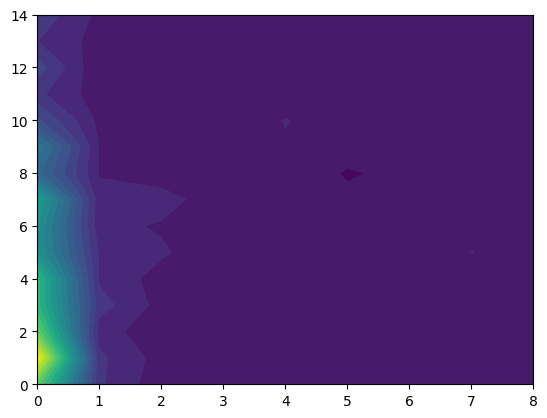

In [52]:
plt.contourf(acc, 20)

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

### <span style="color:green">Supplementary material: Keras model.fit available callbacks</span>

The .fit method can also get <a href=https://keras.io/callbacks/>callback</a> functions which can be used to customize the fitting procedure with special actions.

Keras provides some predefined callbacks to feed in, among them for example:
- **TerminateOnNaN()**: that terminates training when a NaN loss is encountered
- **ModelCheckpoint(filepath)**: that save the model after every epoch
- **EarlyStopping()**: which stop training when a monitored quantity has stopped improving

You can select one or more callback and pass them as a list to the callback argument of the fit method.

Now we are going to construct a callback object to represent how estimated parameters are converging during the training procedure

In [12]:
from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""
        
        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):
        
        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list
        
        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)            
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()     
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()

We will use also an EarlyStopping callback on the val_loss quantity. This will stop the training process as soon as the val_loss quantity does not improve anymore after an amount of epochs, preventing a long time of wated computation to take over without useful results.

<code>keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)</code>

Arguments:

- <code>monitor</code>: quantity to be monitored. 
- <code>min_delta:</code> minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. 
- <code>patience:</code> number of epochs with no improvement after which training will be stopped. 
- <code>verbose:</code> verbosity mode. 
- <code>mode:</code> one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity. 
- <code>baseline:</code> Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline. 
- <code>restore_best_weights:</code> whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

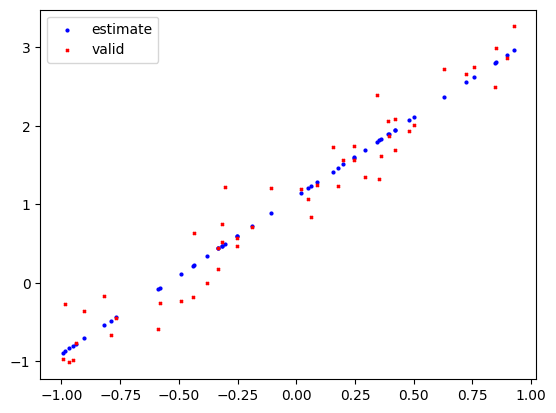

2/2 [==============================] - 0s 101ms/step - loss: 0.0808 - mse: 0.0808 - val_loss: 0.0808 - val_mse: 0.0808


[array([[2.0087578]], dtype=float32), array([1.1064383], dtype=float32)]

In [13]:
plot_estimate = PlotCurrentEstimate(x_valid, y_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(x_valid, y_valid, batch_size=32, epochs=150,
          validation_data=(x_valid, y_valid),
          callbacks=[ plot_estimate, earlystop]
          )

model.get_weights()